In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
#построение окружности

In [3]:
z1 = pd.DataFrame(np.arange(360), columns=['angle'])

In [4]:
z1

,angle
0,0
1,1
2,2
3,3
4,4
...,...
355,355
356,356
357,357
358,358


In [5]:
z1['x'] = z1['angle'].apply(lambda x: 100*np.sin(np.pi*2*x/360) + np.random.uniform(-20,20))

In [6]:
z1

,angle,x
0,0,-7.348816
1,1,-10.918416
2,2,-14.279529
3,3,-1.666324
4,4,19.093675
...,...,...
355,355,-3.155404
356,356,4.471115
357,357,10.997029
358,358,-5.629952


<AxesSubplot:xlabel='angle', ylabel='x'>

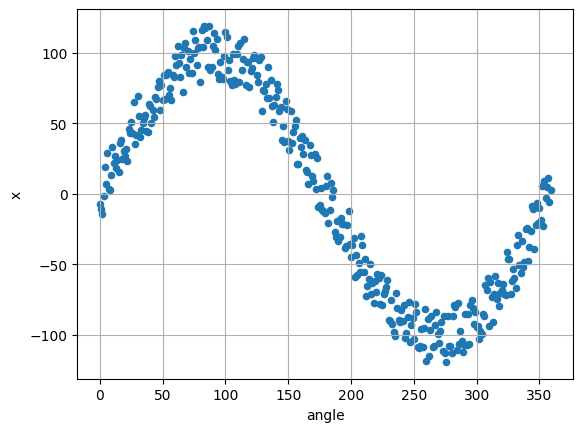

In [7]:
z1.plot(x='angle', y='x', kind='scatter', grid=True, alpha=1)

In [8]:
np.sin(np.pi)

1.2246467991473532e-16

In [9]:
z1['y'] = z1['angle'].apply(lambda x: 100*np.cos(np.pi*2*x/360) + np.random.uniform(-20,20))

<AxesSubplot:xlabel='angle', ylabel='y'>

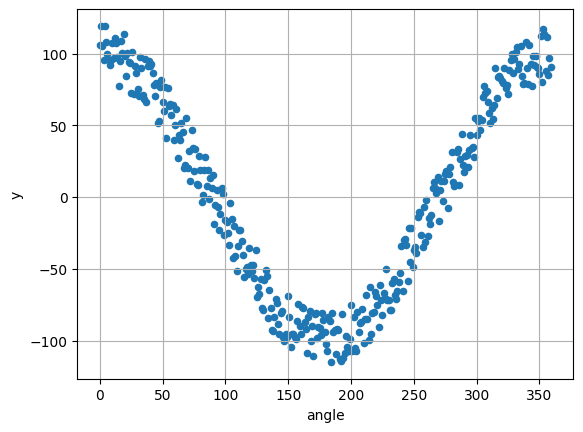

In [10]:
z1.plot(x='angle', y='y', kind='scatter', grid=True, alpha=1)

<AxesSubplot:xlabel='x', ylabel='y'>

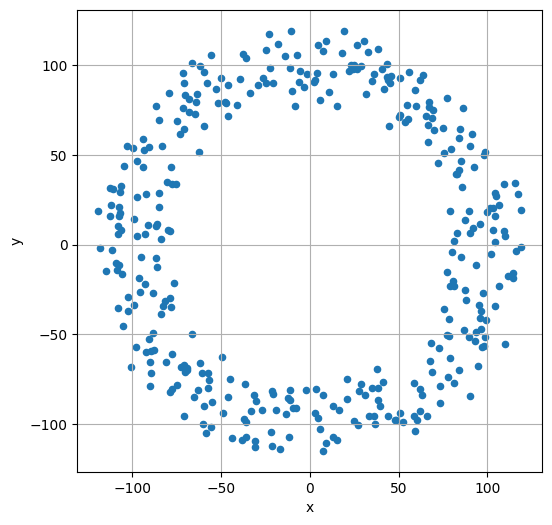

In [11]:
z1.plot(x='x', y='y', kind='scatter', grid=True, alpha=1, figsize=(6,6))

In [12]:
z1['t'] = 0

In [13]:
z1

,angle,x,y,t
0,0,-7.348816,105.889682,0
1,1,-10.918416,118.988135,0
2,2,-14.279529,105.292333,0
3,3,-1.666324,95.391978,0
4,4,19.093675,119.344908,0
...,...,...,...,...
355,355,-3.155404,88.026987,0
356,356,4.471115,111.500365,0
357,357,10.997029,85.206490,0
358,358,-5.629952,97.000916,0


In [14]:
#круг для данных типа 1

In [15]:
z2 = pd.DataFrame(np.arange(360), columns=['angle'])

In [16]:
z2['x'] = z2['angle'].apply(lambda x: 75*np.sin(np.pi*2*x/360) + np.random.uniform(-20,20))

In [17]:
z2['y'] = z2['angle'].apply(lambda x: 75*np.cos(np.pi*2*x/360) + np.random.uniform(-20,20))

In [18]:
z2['t'] = 1

<AxesSubplot:xlabel='x', ylabel='y'>

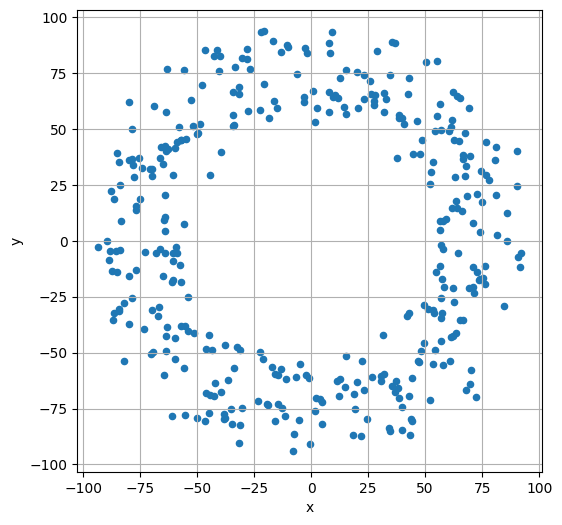

In [19]:
z2.plot(x='x', y='y', kind='scatter', grid=True, alpha=1, figsize=(6,6))

In [20]:
z33 = pd.concat([z1, z2]).reset_index().drop('index', axis=1)

In [21]:
z33

,angle,x,y,t
0,0,-7.348816,105.889682,0
1,1,-10.918416,118.988135,0
2,2,-14.279529,105.292333,0
3,3,-1.666324,95.391978,0
4,4,19.093675,119.344908,0
...,...,...,...,...
715,355,7.792780,57.508490,1
716,356,-1.618061,83.739000,1
717,357,-20.563908,70.161079,1
718,358,9.088629,93.415236,1


In [22]:
z33 = shuffle(z33, random_state=12345).reset_index()

In [23]:
z33

,index,angle,x,y,t
0,589,229,-44.507212,-69.128139,1
1,578,218,-55.795094,-56.963677,1
2,616,256,-81.879878,-27.647515,1
3,682,322,-26.783590,76.886857,1
4,557,197,-6.549652,-60.864808,1
...,...,...,...,...,...
715,420,60,66.725359,38.288609,1
716,129,129,58.534250,-77.071996,0
717,285,285,-77.546200,33.800056,0
718,485,125,43.121241,-32.327907,1


<AxesSubplot:xlabel='x', ylabel='y'>

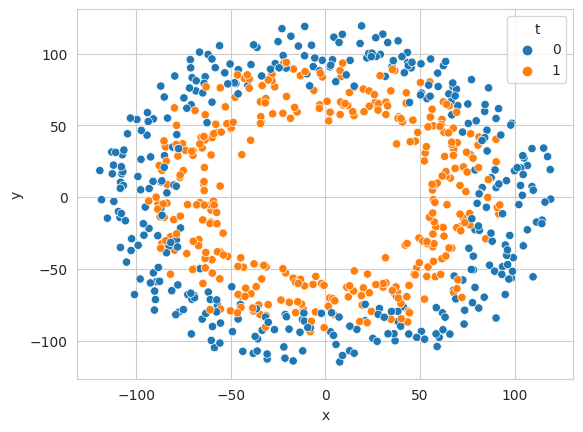

In [24]:
sns.set_style("whitegrid")
sns.scatterplot(data=z33, x='x', y='y', hue='t')

In [25]:
#test

In [26]:
target = z33['t']

In [27]:
target.shape

(720,)

In [28]:
features = z33[['x', 'y']]

In [29]:
features.shape

(720, 2)

### модель - случайный лес

In [30]:
#логарифмическая сетка параметров для модели Случайный Лес
params = {
    'n_estimators':[40,80], 
    'max_depth':[16, 32], 
    'min_samples_split':[2], 
    'min_samples_leaf':[2]
}

In [31]:
rf = RandomForestClassifier(random_state=12345, class_weight='balanced')

In [32]:
clf = GridSearchCV(rf, params, scoring='f1', cv=5, n_jobs=-1)

In [33]:
%%time
clf.fit(features, target)

CPU times: user 263 ms, sys: 103 ms, total: 366 ms
Wall time: 7.23 s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [16, 32], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [40, 80]},
             scoring='f1')

In [34]:
clf.best_score_

0.8004139280844729

In [35]:
clf.best_params_

{'max_depth': 32,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

### модель - SVM

In [36]:
C_range = np.logspace(-2, 4, 7)#13)
gamma_range = np.logspace(-4, 2, 7)#13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [37]:
regr = svm.SVC()

In [38]:
clf = GridSearchCV(regr, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
%%time
clf.fit(features, target)

In [ ]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (clf.best_params_, clf.best_score_)
)